**Introduction**

In [293]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Data Cleaning**

In [294]:
df = pd.read_csv("survey.csv")
df.head()
#Looking at the dataset

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [295]:
df_steps= pd.read_csv("steps.csv", sep = ';')
df.head()
#Looking at the dataset

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [296]:
df_merged = df.merge(df_steps,on=["id"])
df_merged.head()
#Merging both datasets using the ID column

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\nando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


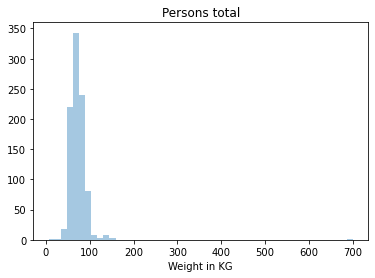

In [297]:
sns.distplot(df_merged['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Persons total')
plt.xlabel('Weight in KG')
plt.show()
#Looking for impossible values, 1 person weighs around 700KG this is an impossible value

In [298]:
def deleteweight(x):

    if (x > 200.0):
        return float('NaN')
    else:
        return x
#Function to return NaN if a person weighs over 200KG

In [299]:
df_merged['weight'] = df_merged['weight'].apply(deleteweight)

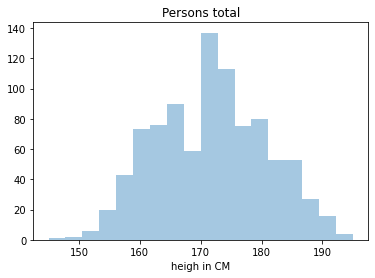

In [300]:
sns.distplot(df_merged['height'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Persons total')
plt.xlabel('heigh in CM')
plt.show()
#Looking for impossible values in height, everything seems correct

In [301]:
test = df_merged.iloc[:465, 9: ].mean(axis = 1, skipna = True)
print(test)
#Getting the mean steps for each person

0      10205.521212
1       5687.423313
2       8301.729730
3       3633.200000
4       5312.129630
           ...     
460     7450.005814
461     5869.992593
462     8467.031447
463     6743.240000
464     9577.093023
Length: 465, dtype: float64


In [302]:
df_merged['Mean_Steps'] = test.round(0)
df_merged.head()
#Merging the mean steps into the dataframe

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean_Steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8302.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.0


**Exploratory data analysis**

Text(0.5, 1.0, 'Steps Distribution')

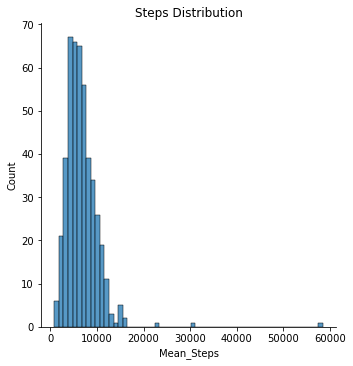

In [303]:
sns.displot(df_merged['Mean_Steps'].dropna(), kde = False)
plt.title('Steps Distribution')
#There is an outlier with close to 60000 steps on average, this is a bit high so it will be investigated

In [304]:
df_merged.loc[df_merged['Mean_Steps'] > 50000].head()
#Seems like this is an outlier, it will be deleted

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean_Steps
95,96,Bordeaux,Female,25-34,3,5,Master or doctorate,161.0,52.0,6060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58491.0


In [305]:
index = df_merged[df_merged['id'] == 96].index
df_merged.drop(index, inplace=True)
#Dropped the outlier

In [306]:
df_merged.describe()
#statistics from the dataframe
#here you can see more outliers aswell, a person that weighs 6KG

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean_Steps
count,928.000000,928.000000,928.000000,927.000000,925.000000,23.000000,242.000000,277.000000,295.000000,353.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,462.000000
mean,465.397629,2.341595,2.528017,171.679612,72.178378,3537.304348,9024.252066,10923.581227,7421.555932,8104.606232,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,6634.400433
std,268.194194,1.226599,1.272594,9.078363,15.678437,4006.278430,6423.982760,6268.988279,6737.022902,5502.265638,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,3081.763183
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,842.000000
25%,233.750000,1.000000,1.000000,165.000000,61.000000,299.000000,4385.750000,6564.000000,2771.000000,4428.000000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,4502.750000
50%,465.500000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,6116.500000
75%,697.250000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14370.000000,10496.500000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,8308.750000
max,929.000000,11.000000,5.000000,195.000000,155.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,30374.000000


In [307]:
index = df_merged[df_merged['weight'] == 6].index
df_merged.drop(index, inplace=True)
#Dropped the outlier

<AxesSubplot:ylabel='Density'>

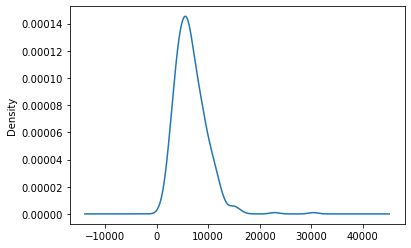

In [308]:
df_merged['Mean_Steps'].plot(kind='kde')

In [309]:
#This model is left skewed, as you can see in the earlier histogram the mode is at the top and then it starts going down
#The median was already before that

<function matplotlib.pyplot.show(close=None, block=None)>

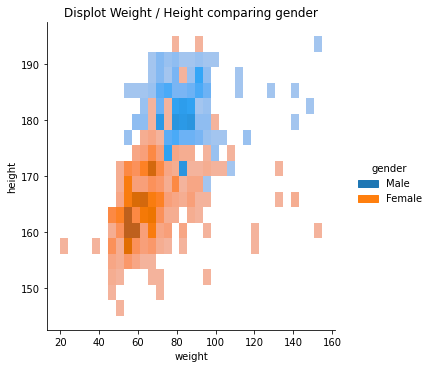

In [310]:
sns.displot(data=df_merged, x="weight", y="height", hue="gender")
plt.title('Displot Weight / Height comparing gender')
plt.show

In [311]:
#Here you can see a displot. What I can see from this is that males are usually taller then females
#On average females weigh a little less then men

<function matplotlib.pyplot.show(close=None, block=None)>

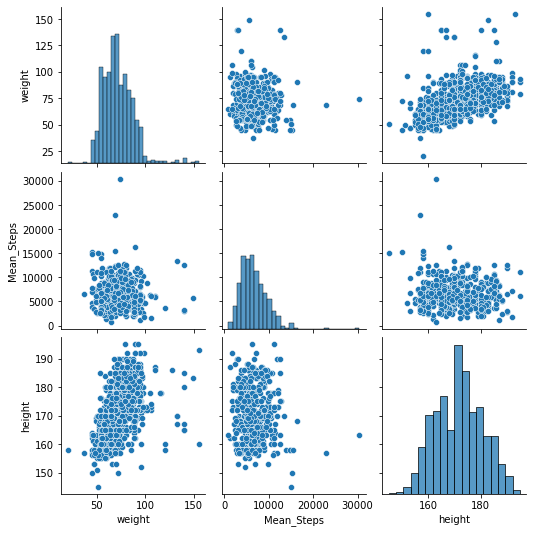

In [312]:
df_subset = df_merged[['weight', 'Mean_Steps', 'height']]

sns.pairplot(df_subset)
plt.show

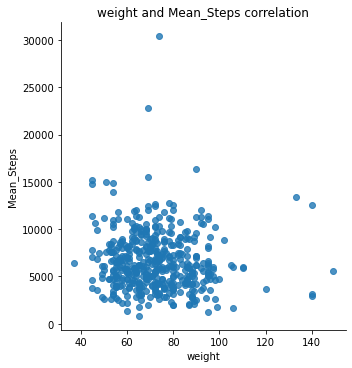

In [313]:
sns.lmplot(x='weight', y='Mean_Steps', fit_reg=False, data=df_merged)
plt.xlabel('weight') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean_Steps')
plt.title('weight and Mean_Steps correlation')
plt.show()

In [314]:
corr = df_merged[['weight', 'Mean_Steps', 'height']].corr() 
corr
#seems to be an issue with the many NaN values for mean steps

,weight,Mean_Steps,height
weight,1.000000,-0.070108,0.510996
Mean_Steps,-0.070108,1.000000,-0.109571
height,0.510996,-0.109571,1.000000


In [315]:
df_merged = df_merged.dropna(subset=["Mean_Steps", "weight", "height" ])
df_merged.head()
#dropped rows with NaNs in these columns, since I got an error trying to make the prediction model


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean_Steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8302.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.0


In [316]:
df_merged.gender[df_merged.gender == 'Male'] = 0
df_merged.gender[df_merged.gender == 'Female'] = 1
df_merged.head()
#making female and male numeric values so I can use this in the model

C:\Users\nando\AppData\Local\Temp\ipykernel_32180\338130406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.gender[df_merged.gender == 'Female'] = 1


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean_Steps
0,1,Bordeaux,0,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206.0
1,2,Lille,0,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.0
2,3,Montpellier,0,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8302.0
3,4,Lyon,0,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.0
4,5,Montpellier,1,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.0


In [317]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df_merged[['height', 'gender', 'weight']] 
y = df_merged['Mean_Steps']
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y, ) #this "fits" the model

In [318]:
df_merged['Mean_Steps_P'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df_merged.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,Mean_Steps,Mean_Steps_P
0,1,Bordeaux,0,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206.0,6348.356630
1,2,Lille,0,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.0,6352.255103
2,3,Montpellier,0,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8302.0,6325.648015
3,4,Lyon,0,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.0,6428.177896
4,5,Montpellier,1,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.0,6704.214781
5,6,Lille,0,35-44,1,1,Vocational,170.0,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11909.0,6860.469992
6,7,Montpellier,0,25-34,2,2,Master or doctorate,175.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4715.0,6584.189974
7,8,Bordeaux,1,25-34,3,4,Master or doctorate,165.0,88.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3594.0,6673.709219
8,9,Lille,1,35-44,4,4,Vocational,172.0,69.0,NaN,...,11731.0,14151.0,NaN,3996.0,2556.0,302.0,2442.0,NaN,8627.0,6445.672822
9,10,Lille,1,25-34,2,2,Master or doctorate,165.0,93.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3787.0,6651.536646


In [319]:
from sklearn.metrics import r2_score #we need this function from sklearn
round(r2_score(df_merged['Mean_Steps'], df_merged['Mean_Steps_P']), 2)
#r2 score is low, prediction model is not good

0.01

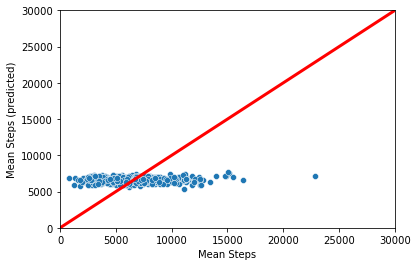

In [320]:
sns.scatterplot(x='Mean_Steps',y='Mean_Steps_P',data=df_merged)
plt.xlim(0, 30000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 30000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 30000], [0, 30000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Mean Steps')
plt.ylabel('Mean Steps (predicted)')
plt.show()


In [321]:
#what I can see from this model is that there are not a lot of dots on the line, this means that the predicted value and
#the actual value don't line up. This is because the prediction model is not that good, with only 0.1 r2 score.
#There is also one outlier, I am not sure if this is real data